In [20]:
import pandas as pd
import numpy as np
from glob import glob 
#The glob function specifically is used to return a list of paths matching a specified pattern.
import cv2
import matplotlib.pylab as plt 
plt.style.use('ggplot')

In [21]:
cat_files = glob('D:/Kaggle/test_set/test_set/cats/*.jpg')
#This line of code is using the glob function to find all files with the '.jpg' extension in a specific directory
dog_files = glob('D:/Kaggle/test_set/test_set/dogs/*.jpg')



In [22]:
print(len(cat_files))
print(len(dog_files))

1011
1012


In [23]:
#trying to load an image file using two different libraries
img_mpl = plt.imread(cat_files[21])
img_cv2 = cv2.imread(cat_files[21])
img_mpl.shape, img_cv2.shape

((134, 250, 3), (134, 250, 3))

<function matplotlib.pyplot.show(close=None, block=None)>

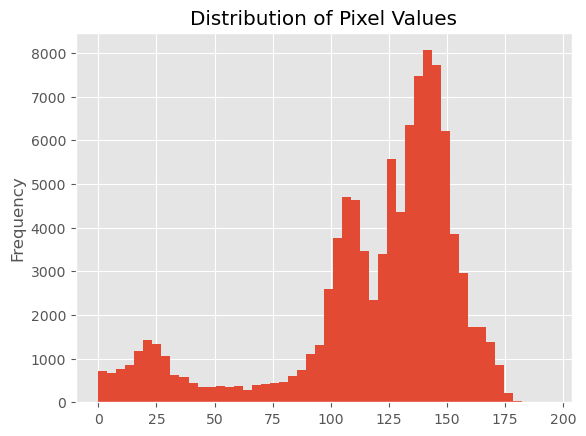

In [24]:
#This creates a Pandas Series containing all the pixel values from the image loaded with Matplotlib (img_mpl). flatten() is used to convert the 2D array of pixel values into a 1D array.
#bins 50 means interval of 50
pd.Series(img_mpl.flatten()).plot(kind='hist', bins=50, title='Distribution of Pixel Values')
plt.show

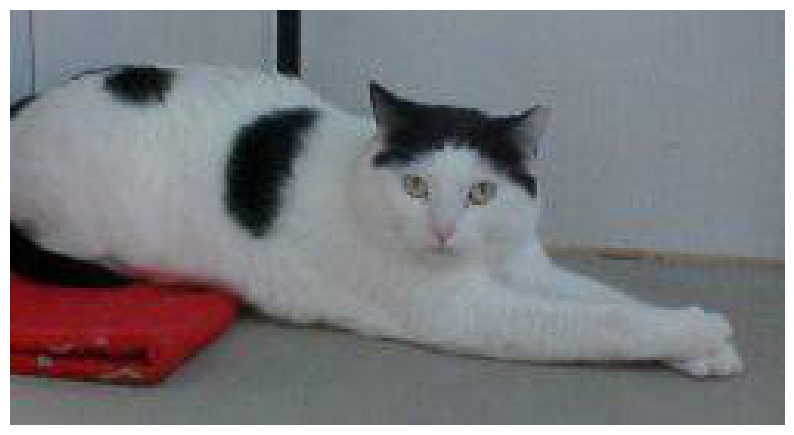

In [37]:
#The fig variable refers to the entire figure, while ax refers to the individual subplot or axes within the figure.
fig, ax = plt.subplots(figsize=(10,10))
#imshow() is specifically used to display images in Matplotlib.
ax.imshow(img_mpl)
ax.axis('off')
plt.show()

(-0.5, 249.5, 133.5, -0.5)

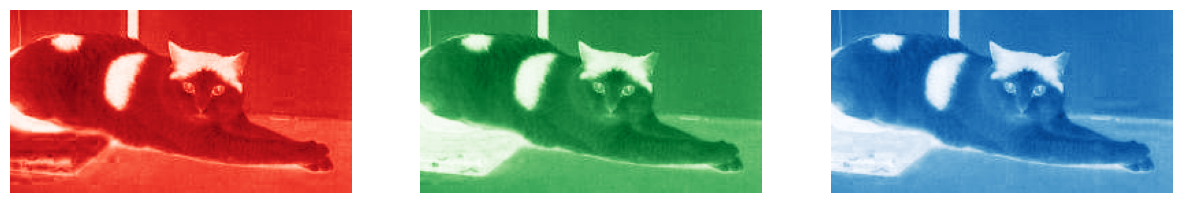

In [26]:
fig, axs = plt.subplots(1,3,figsize = (15,5)) #creating 1 row with 3 columns
#axs[0] shows the first color channel of the image
axs[0].imshow(img_mpl[:,:,0], cmap="Reds")#T[:,:,0] indexing selects all rows&columns of the image array and the 0 index selects the first color channel
axs[1].imshow(img_mpl[:,:,1], cmap="Greens")
axs[2].imshow(img_mpl[:,:,2], cmap="Blues")
axs[0].axis("off")
axs[1].axis("off")
axs[2].axis("off")

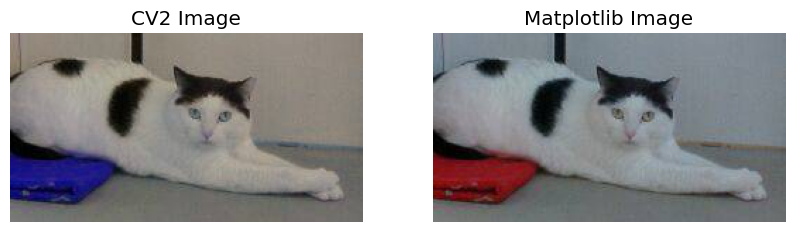

In [27]:
#cv2 reads in channels as BGR and matplotlib reads in channels as RGB
fig, axs = plt.subplots(1,2, figsize=(10,5))
axs[0].imshow(img_cv2)
axs[1].imshow(img_mpl)
axs[0].axis('off')
axs[1].axis('off')
axs[0].set_title('CV2 Image')
axs[1].set_title('Matplotlib Image')
plt.show()

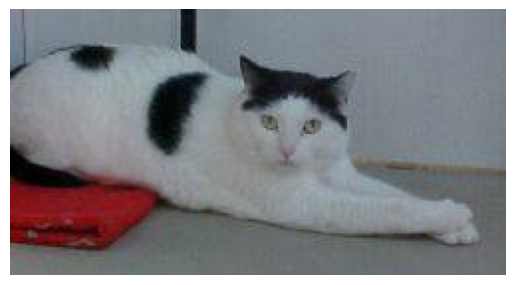

In [28]:
#converting from BGR to RGB
img_cv2_rgb = cv2.cvtColor(img_cv2, cv2.COLOR_BGR2RGB)
fig, ax= plt.subplots()
ax.imshow(img_cv2_rgb)
ax.axis('off')
plt.show()

(-0.5, 499.5, 373.5, -0.5)

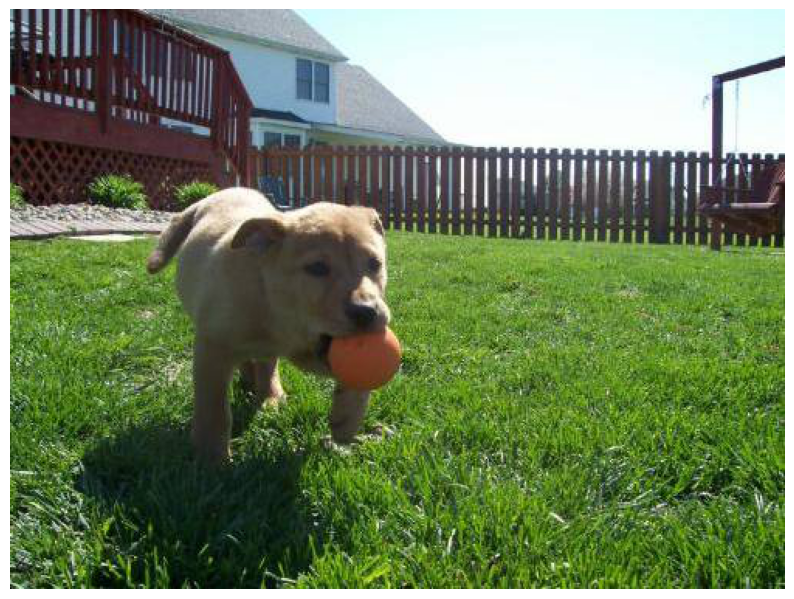

In [29]:
#loading dog image
img = plt.imread(dog_files[61])
fig, ax = plt.subplots(figsize=(10,10))
plt.imshow(img)
ax.axis('off')


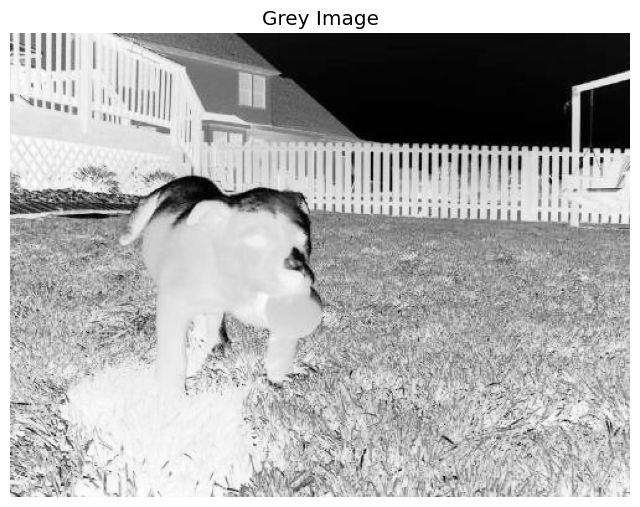

In [30]:
#converting the image into grey image
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(img_gray, cmap='Greys')
ax.axis('off')
ax.set_title('Grey Image')
plt.show()

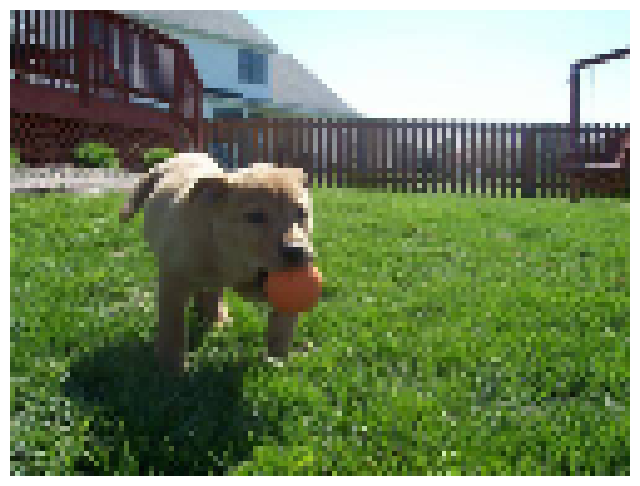

In [31]:
#resizing and Scaling the image.
#In this case, both are set to 0.25, which means the image will be resized to 25% of its original width and height.
img_resized = cv2.resize(img, None, fx=0.25, fy=0.25)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(img_resized)
ax.axis('off')
plt.show()

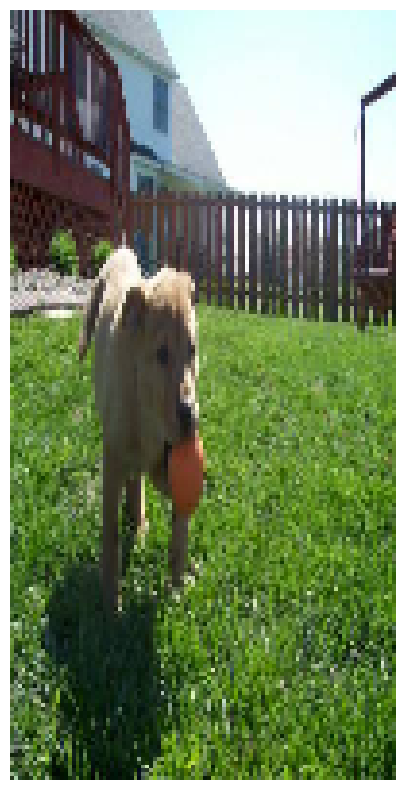

In [32]:
# Different Size
img_resize = cv2.resize(img, (100, 200))
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(img_resize)
ax.axis('off')
plt.show()

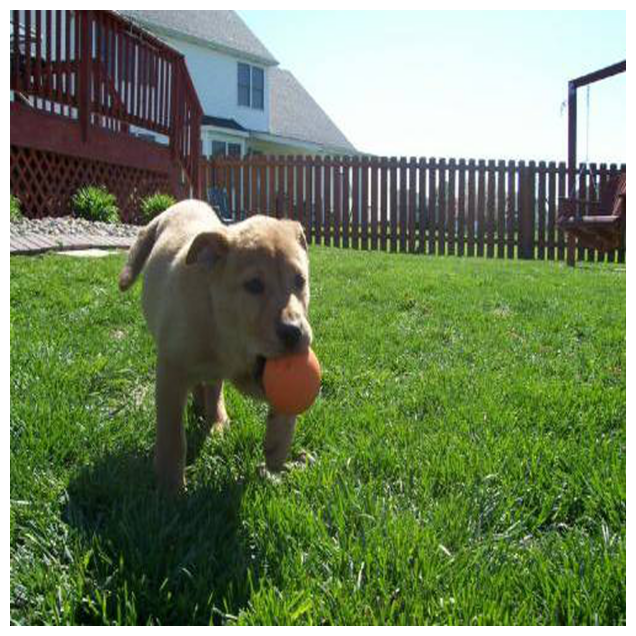

In [33]:
#cv2.INTER_CUBIC is a good choice for enlarging images.
#resize an image to a size of 5000x5000 pixels using cubic interpolation:
img_resize = cv2.resize(img, (5000, 5000), interpolation = cv2.INTER_CUBIC)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(img_resize)
ax.axis('off')
plt.show()

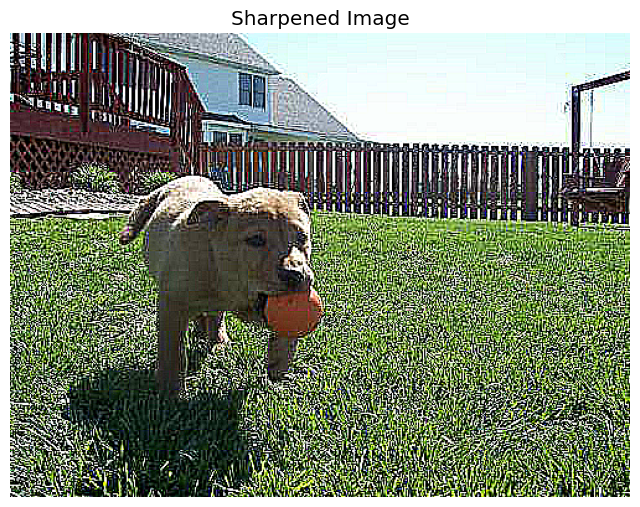

In [34]:
# Sharpening Image
#kernel_sharpening is the sharpening kernel you provided. This kernel enhances the  
#central pixel's intensity and suppresses the surrounding pixels.
kernel_sharpening = np.array([[-1,-1,-1], 
                              [-1,9,-1], 
                              [-1,-1,-1]])

sharpened = cv2.filter2D(img, -1, kernel_sharpening)
#-1 argument for the depth indicates that the output image will have the
#same depth as the input image.
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(sharpened)
ax.axis('off')
ax.set_title('Sharpened Image')
plt.show()

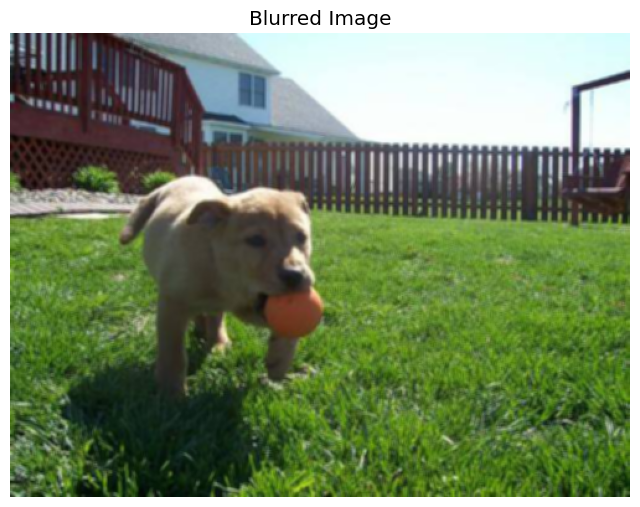

In [35]:
# Blurring the image
kernel_3x3 = np.ones((3, 3), np.float32) / 9
blurred = cv2.filter2D(img, -1, kernel_3x3)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(blurred)
ax.axis('off')
ax.set_title('Blurred Image')
plt.show()

In [63]:
plt.imsave('mpl_dog.png', blurred)
cv2.imwrite('cv2_dog.png', blurred)

True